# Πρώτη Σειρά Ασκήσεων 


# Αλέξανδρος Καπενης 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt #main plotting tool for python
import matplotlib as mpl
import seaborn as sns

# pre processing

In [2]:
df = pd.read_csv('Seasons_Stats.csv')
#df.head


Αρχικά διαβάζουμε το αρχείο από τη μνήμη και κάνουμε import όλες τις απαραίτητες βιβλιοθήκες.


In [3]:
#pre processing
trim_df=df[(df.Age>18) & (df.Age<40) & (df.Year>1980) & (df.MP >499)]
#trim_df.shape
trim_df1= trim_df["Pos"].isin(["PG","SG","SF","PF","C"])
trim_df=trim_df[trim_df1]
trim_df.head()
trim_df= trim_df.sort_values(['Year','Player'])
#trim_df.columns
trim_df['PTS'] = trim_df.PTS.astype(int)
trim_df.dtypes
trim_df.head()
#trim_df.shape
#df.shape


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
6237,6237,1981.0,Abdul Jeelani,SF,26.0,DAL,66.0,NaN,1108.0,15.5,...,0.814,83.0,147.0,230.0,65.0,44.0,31.0,87.0,123.0,553
6152,6152,1981.0,Adrian Dantley*,SF,24.0,UTA,80.0,NaN,3417.0,24.3,...,0.806,192.0,317.0,509.0,322.0,109.0,18.0,282.0,245.0,2452
6178,6178,1981.0,Alex English*,SF,27.0,DEN,81.0,NaN,3093.0,19.7,...,0.850,273.0,373.0,646.0,290.0,106.0,100.0,241.0,255.0,1929
6112,6112,1981.0,Allan Bristow,SF,29.0,UTA,82.0,NaN,2001.0,14.9,...,0.838,103.0,327.0,430.0,383.0,63.0,3.0,171.0,190.0,713
6286,6286,1981.0,Allen Leavell,PG,23.0,HOU,79.0,NaN,1686.0,13.9,...,0.832,30.0,104.0,134.0,384.0,97.0,15.0,189.0,160.0,642


  Κάνουμε την απαραίτητη προεπεξεργασία των δεδομένων και τα βάζουμε σε ένα νέο DataFrame ώστε να κάνουμε ευκολότερη τη διαχείριση τους αργότερα. 

In [4]:
#pre processing
trim_df =trim_df.reset_index()
trim_df =trim_df.drop(['Unnamed: 0','index'],axis =1)
trim_df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1981.0,Abdul Jeelani,SF,26.0,DAL,66.0,NaN,1108.0,15.5,0.515,...,0.814,83.0,147.0,230.0,65.0,44.0,31.0,87.0,123.0,553
1,1981.0,Adrian Dantley*,SF,24.0,UTA,80.0,NaN,3417.0,24.3,0.622,...,0.806,192.0,317.0,509.0,322.0,109.0,18.0,282.0,245.0,2452
2,1981.0,Alex English*,SF,27.0,DEN,81.0,NaN,3093.0,19.7,0.549,...,0.850,273.0,373.0,646.0,290.0,106.0,100.0,241.0,255.0,1929
3,1981.0,Allan Bristow,SF,29.0,UTA,82.0,NaN,2001.0,14.9,0.511,...,0.838,103.0,327.0,430.0,383.0,63.0,3.0,171.0,190.0,713
4,1981.0,Allen Leavell,PG,23.0,HOU,79.0,NaN,1686.0,13.9,0.523,...,0.832,30.0,104.0,134.0,384.0,97.0,15.0,189.0,160.0,642


  Κάνουμε και μια ταξινόμηση ανά έτος και ξανά αναθέτουμε τον δείκτη ώστε να είναι με τη σειρά ,επίσης πετάμε και τη στήλη Unnamed: 0 που ήταν ο αρχικός δείκτης του αρχείο αφού πλέον δε μας χρειάζεται και δεν είναι με τη σειρά που θέλουμε εμείς .

In [5]:
ps = pd.read_csv('Players.csv')
ps.head()


,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [6]:
psd=pd.read_csv('player_data.csv')
psd.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


Ελέγχουμε και τα αλλά αρχεία του σετ για τυχόν χρήσιμα δεδομένα που θα μπορούσαμε να χρησιμοποιήσουμε .

Για τα γραφήματα δε κατάφερα να βάλω το τελευταίο στο ίδιο grid με τα υπόλοιπα γραφήματα ,μάλλον επειδή χρησιμοποίησα διαφορετική συνάρτηση . 

# Ερωτημα Α

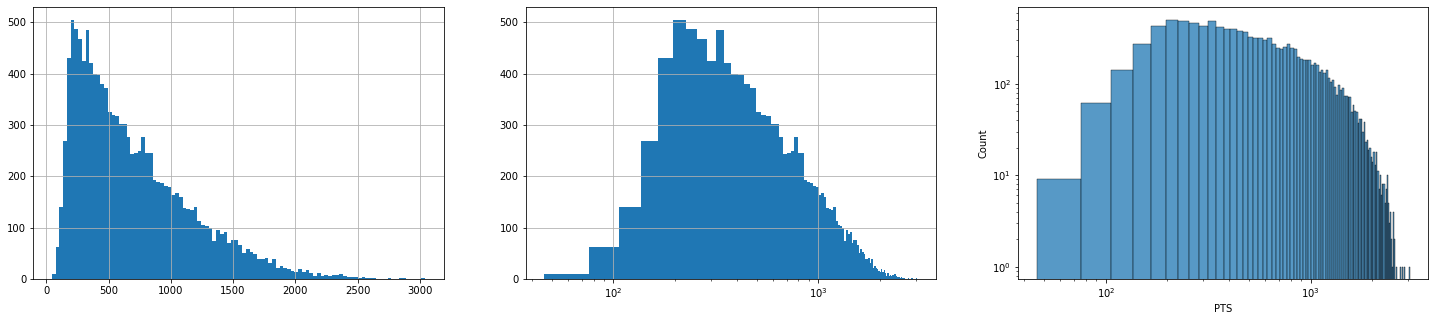

In [7]:
### Alfa erwthma
#plt.figure();
fig,ax = plt.subplots(1, 3,figsize=(25,5))
trim_df['PTS'].hist(bins=100,ax = ax[0]);
#plt.figure();
trim_df['PTS'].hist(bins=100,ax = ax[1]);
ax[1].set_xscale('log')
#plt.xscale('log')
#plt.figure();
bin_width =int(max(trim_df.PTS)/100); 

sns.histplot(trim_df.PTS, bins=100,binwidth=bin_width, ax=ax[2])
ax[2].set_xscale('log')
ax[2].set_yscale('log')

# points = list(trim_df.PTS)
# points.sort()
# points = list(dict.fromkeys(points))
# points.reverse()
# index = np.arange(1,(len(points)+1),1)
# plt.scatter(points,index)
# #plt.xlabel('Data')


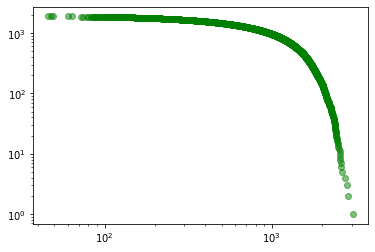

In [8]:
### Alfa erwthma
points = list(trim_df.PTS)
points.sort()
points = list(dict.fromkeys(points))
points.reverse()
#print(points)

index = np.arange(1,(len(points)+1),1)

plt.scatter(points,index,c="Green" ,alpha=0.5)
plt.xscale('log')
plt.yscale('log')


Απο τα γραφιματα παρατηρουμε ότι οι περισοττεροι παιχτες  σκοραρουν εως και 500 .ετσι εχουμε το μεγαλητερο μερος των παιχτων πανω από τους 500 ποντους αλλα και με καποιους λιγοτερους αλλα αρκετους να σκοραρουν περισοτερους  από 500 και λιγοτερους από 1500  ποντους με ελαχιστους να σπανε το φραγμα των 1500 ποντων.

# some more processing

In [9]:
trim_df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1981.0,Abdul Jeelani,SF,26.0,DAL,66.0,NaN,1108.0,15.5,0.515,...,0.814,83.0,147.0,230.0,65.0,44.0,31.0,87.0,123.0,553
1,1981.0,Adrian Dantley*,SF,24.0,UTA,80.0,NaN,3417.0,24.3,0.622,...,0.806,192.0,317.0,509.0,322.0,109.0,18.0,282.0,245.0,2452
2,1981.0,Alex English*,SF,27.0,DEN,81.0,NaN,3093.0,19.7,0.549,...,0.850,273.0,373.0,646.0,290.0,106.0,100.0,241.0,255.0,1929
3,1981.0,Allan Bristow,SF,29.0,UTA,82.0,NaN,2001.0,14.9,0.511,...,0.838,103.0,327.0,430.0,383.0,63.0,3.0,171.0,190.0,713
4,1981.0,Allen Leavell,PG,23.0,HOU,79.0,NaN,1686.0,13.9,0.523,...,0.832,30.0,104.0,134.0,384.0,97.0,15.0,189.0,160.0,642


In [10]:
trim_df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [11]:
#more pre processing drop colums
tc_df=trim_df[['Year','Player','Pos', 'Age', 'Tm','G','TS%','MP','PER','TRB','AST','BLK','PTS']]
tc_df

,Year,Player,Pos,Age,Tm,G,TS%,MP,PER,TRB,AST,BLK,PTS
0,1981.0,Abdul Jeelani,SF,26.0,DAL,66.0,0.515,1108.0,15.5,230.0,65.0,31.0,553
1,1981.0,Adrian Dantley*,SF,24.0,UTA,80.0,0.622,3417.0,24.3,509.0,322.0,18.0,2452
2,1981.0,Alex English*,SF,27.0,DEN,81.0,0.549,3093.0,19.7,646.0,290.0,100.0,1929
3,1981.0,Allan Bristow,SF,29.0,UTA,82.0,0.511,2001.0,14.9,430.0,383.0,3.0,713
4,1981.0,Allen Leavell,PG,23.0,HOU,79.0,0.523,1686.0,13.9,134.0,384.0,15.0,642
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12280,2017.0,Yogi Ferrell,PG,23.0,TOT,46.0,0.533,1197.0,13.1,111.0,172.0,9.0,462
12281,2017.0,Yogi Ferrell,PG,23.0,DAL,36.0,0.541,1046.0,14.1,99.0,155.0,7.0,408
12282,2017.0,Zach LaVine,SG,21.0,MIN,47.0,0.576,1749.0,14.6,159.0,139.0,10.0,889
12283,2017.0,Zach Randolph,PF,35.0,MEM,73.0,0.490,1786.0,18.5,598.0,122.0,10.0,1028


# Ερωτημα Β

<AxesSubplot:xlabel='Age', ylabel='Ts'>

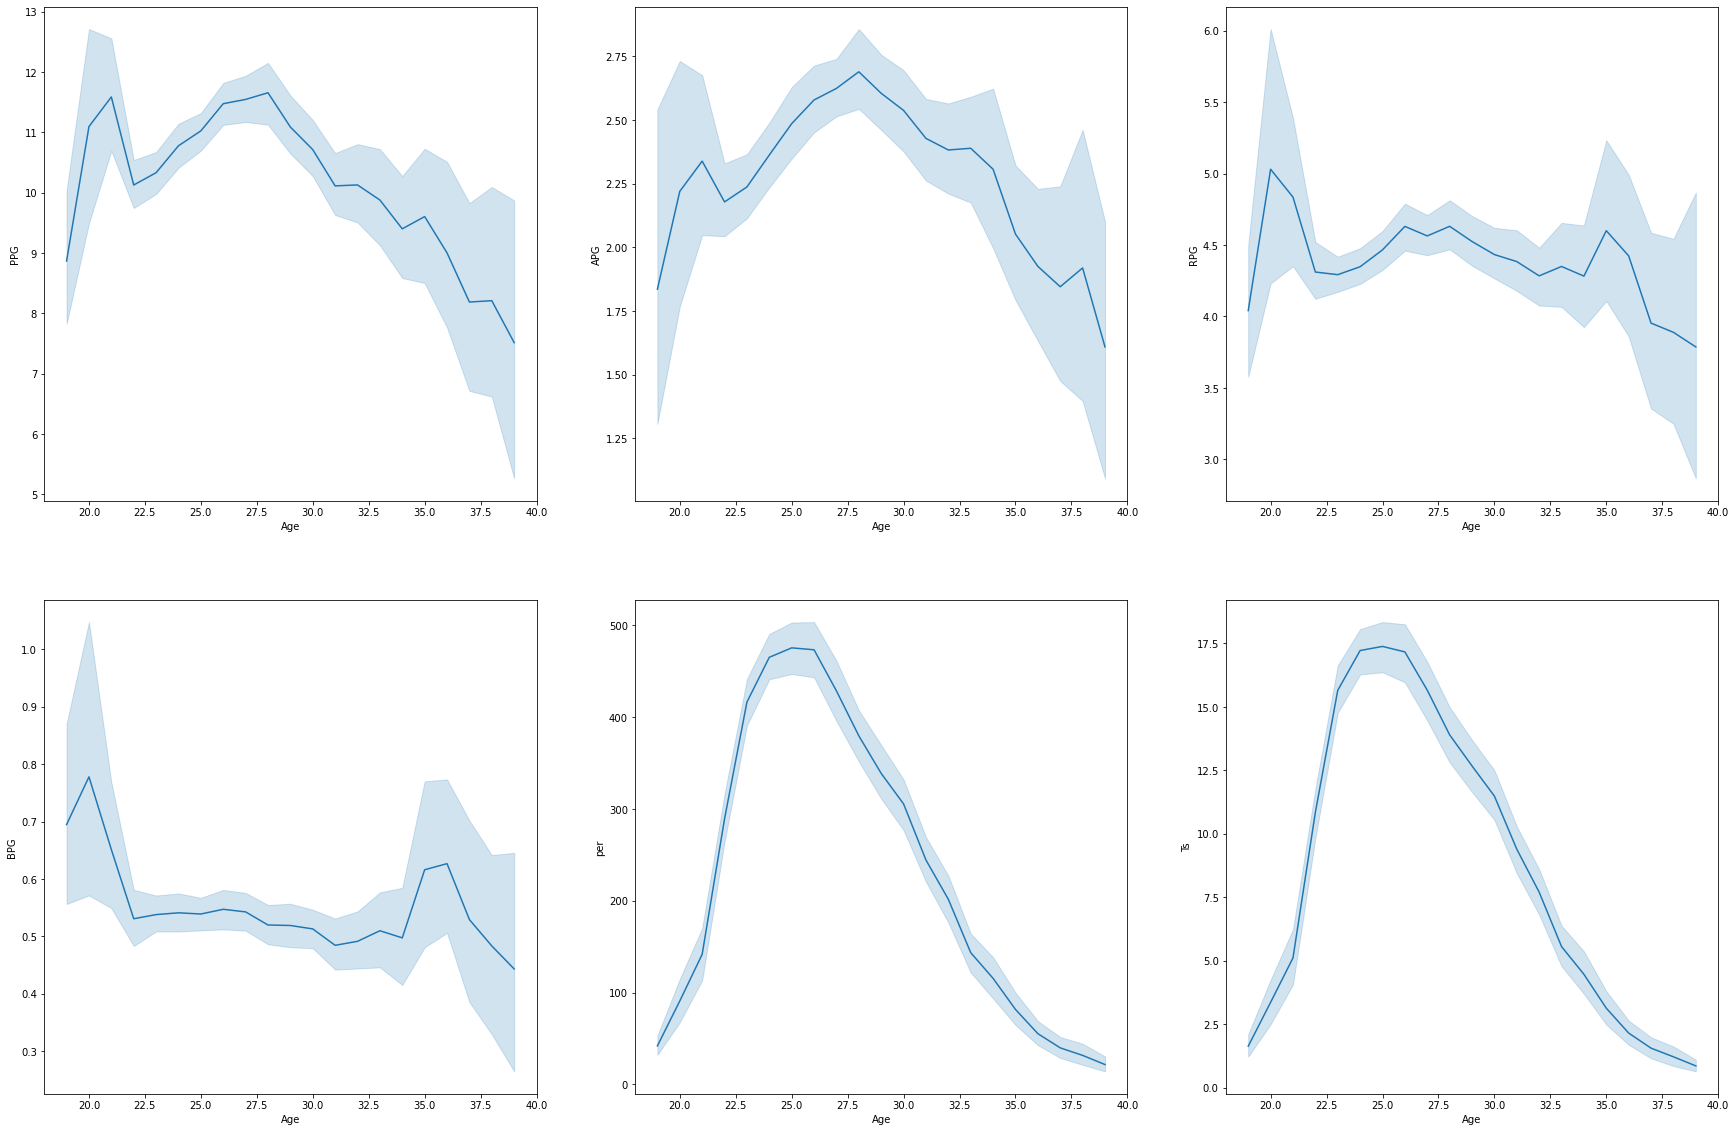

In [12]:
### Bita erwthma
temp =tc_df.groupby(['Year','Age']).sum()
temp['PPG']=(temp.PTS/temp.G)
temp['APG']=(temp.AST/temp.G)
temp['RPG']=(temp.TRB/temp.G)
temp['BPG']=(temp.BLK/temp.G)
temp['per']=(temp.PER)
temp['Ts']=(temp['TS%'])

fig,ax = plt.subplots(2, 3,figsize=(30,20))
sns.lineplot(data=temp,x='Age',y='PPG',ax=ax[0,0])
sns.lineplot(data=temp,x='Age',y='APG',ax=ax[0,1])
sns.lineplot(data=temp,x='Age',y='RPG',ax=ax[0,2])
sns.lineplot(data=temp,x='Age',y='BPG',ax=ax[1,0])
sns.lineplot(data=temp,x='Age',y='per',ax=ax[1,1])
sns.lineplot(data=temp,x='Age',y='Ts',ax=ax[1,2])

    Από τα γραφήματα παρατηρούμε  για τους τους πόντους ότι σκοράρουν περισσότερους όσο είναι μικρότεροι σε ηλικία μέχρι τα 27 τους .Για της ασιστ βλέπουμε ότι οι παίχτες είναι πιο αποδοτική από τα 25 μέχρι τα 30 .Για τα ριμπάουντς βλέπουμε ότι οι παίχτες σε όλο το φάσμα των ηλικιών έχουν παροιμία απόδοση με τους πολύ νέους κάτω των 25 να έχουν περισσότερα λόγο φυσικής κατάστασης να είναι πιο αλτικοί από ότι στις υπόλοιπες ηλικίες το ίδιο συμβαίνει και στα μπλοκς καθώς μπορούν να πηδάνε πιο ψηλά .Επίσης για τα μπλοκς βλέπουμε ότι και οι παίχτες άνω των ~33 πετυχαίνουν αρκετά ίσως βάση της εμπειρίας που έχουν αποκτήσει αλλά ίσως και της σωματικής τους διάπλασης .Από τα τελευταία δύο γραφήματα παρατηρούμε ότι οι παίκτες είναι πιο αποδοτικοί γενικά αλλά και στο να πετυχαίνουν καλαθιά στις ηλικίες 25 με 27  καθώς τότε είναι ίσως στο μέγιστο της φυσικής τους κατάστασης αλλά έχουν απόκτηση και αρκετή εμπειρία 

# Ερωτημα Γ

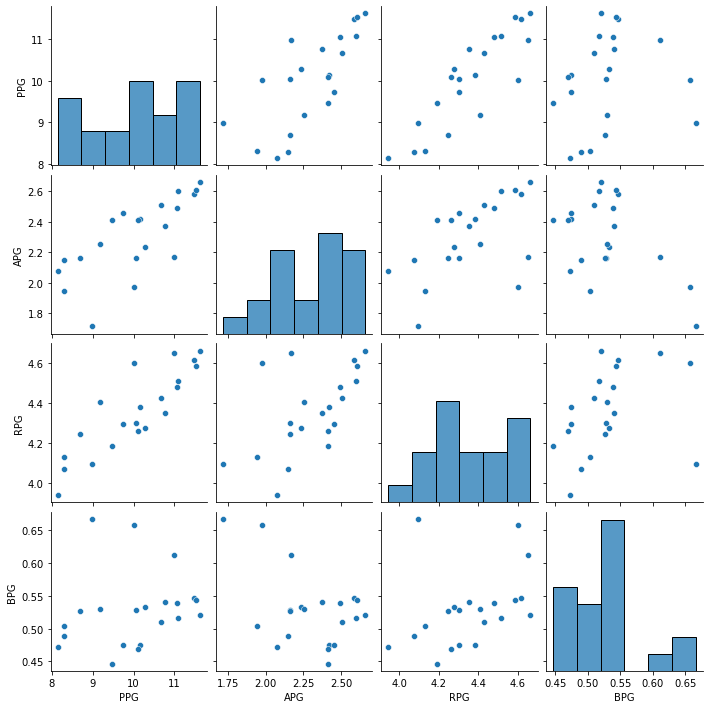

In [13]:
### Gamma erwthma
temp2 =tc_df.groupby(['Age']).sum()
temp2['PPG']=(temp2.PTS/temp2.G)
temp2['APG']=(temp2.AST/temp2.G)
temp2['RPG']=(temp2.TRB/temp2.G)
temp2['BPG']=(temp2.BLK/temp2.G)
temp2
sns.pairplot(temp2[['PPG','APG','RPG','BPG']])

          PPG       APG       RPG       BPG
PPG  1.000000  0.730120  0.869187  0.186840
APG  0.730120  1.000000  0.566157 -0.471171
RPG  0.869187  0.566157  1.000000  0.360162
BPG  0.186840 -0.471171  0.360162  1.000000
              PPG            APG       RPG       BPG
PPG  0.000000e+00   3.163435e-07  0.000172  0.417390
APG  1.716507e-04   7.462667e-03  0.000000  0.031083
RPG  3.163435e-07  3.532105e-150  0.007463  0.108766
BPG  4.173903e-01   1.087658e-01  0.031083  0.000000


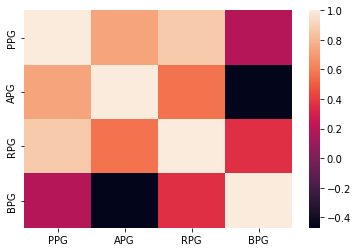

In [14]:
### Gamma erwthma
corn=temp2[['PPG','APG','RPG','BPG']].corr(method="pearson")
print(corn)
sns.heatmap(corn)
pval=pd.DataFrame(corn)
r,p1=stats.pearsonr(temp2.PPG,temp2.PPG)
r,p2=stats.pearsonr(temp2.PPG,temp2.RPG)
r,p3=stats.pearsonr(temp2.PPG,temp2.APG)
r,p4=stats.pearsonr(temp2.PPG,temp2.BPG)
pval.loc[["PPG"],["PPG"]]= p1
pval.loc[["PPG"],["APG"]]= p2
pval.loc[["PPG"],["RPG"]]= p3
pval.loc[["PPG"],["BPG"]]= p4
r,p1=stats.pearsonr(temp2.APG,temp2.PPG)
r,p2=stats.pearsonr(temp2.APG,temp2.RPG)
r,p3=stats.pearsonr(temp2.APG,temp2.APG)
r,p4=stats.pearsonr(temp2.APG,temp2.BPG)
pval.loc[["APG"],["PPG"]]= p1
pval.loc[["APG"],["APG"]]= p2
pval.loc[["APG"],["RPG"]]= p3
pval.loc[["APG"],["BPG"]]= p4
r,p1=stats.pearsonr(temp2.RPG,temp2.PPG)
r,p2=stats.pearsonr(temp2.RPG,temp2.RPG)
r,p3=stats.pearsonr(temp2.RPG,temp2.APG)
r,p4=stats.pearsonr(temp2.RPG,temp2.BPG)
pval.loc[["RPG"],["PPG"]]= p1
pval.loc[["RPG"],["APG"]]= p2
pval.loc[["RPG"],["RPG"]]= p3
pval.loc[["RPG"],["BPG"]]= p4
r,p1=stats.pearsonr(temp2.BPG,temp2.PPG)
r,p2=stats.pearsonr(temp2.BPG,temp2.RPG)
r,p3=stats.pearsonr(temp2.BPG,temp2.APG)
r,p4=stats.pearsonr(temp2.BPG,temp2.BPG)
pval.loc[["BPG"],["PPG"]]= p1
pval.loc[["BPG"],["APG"]]= p2
pval.loc[["BPG"],["RPG"]]= p3
pval.loc[["BPG"],["BPG"]]= p4
print(pval)



Από το  heatmap τα γραφήματα και τους πίνακες παρατηρούμε ότι οι ασιστ και οι πόντοι σε κάθε  παιχνίδι  έχουν μεγάλη συσχέτιση καθώς έχουμε αρκετά μεγάλο coefficient και ένα πολύ μικρό p value<0.05 .
Το ίδιο μπορούμε να πούμε για τα ασσιστ και τα ριμπάουντς  καθώς και εδώ έχουμε μεγάλο 
coefficient και ένα πολύ μικρό p value<0.05.
Και αυτό είναι και αναμενόμενο καθώς πολλές επιθέσεις ξεκινούν από ένα ριμπάουντ μια γρήγορη επίθεση μια ασσιστ και τελικά ένα καλάθι.
Παρατηρούμε πως τα μπλοκ δεν συνδέονται τόσο καλά με τα αλλά στατιστικά και αυτό είναι λογικό για τη πολλές φορές ένα μπλοκ θα οδηγήσει σε φάουλ αν είχαμε και αλλά δεδομένα ίσως θα μπορούσαμε να τα συσχετίσουμε καλυτέρα.


# Ερωτημα Δ

<AxesSubplot:xlabel='Pos', ylabel='BPG'>

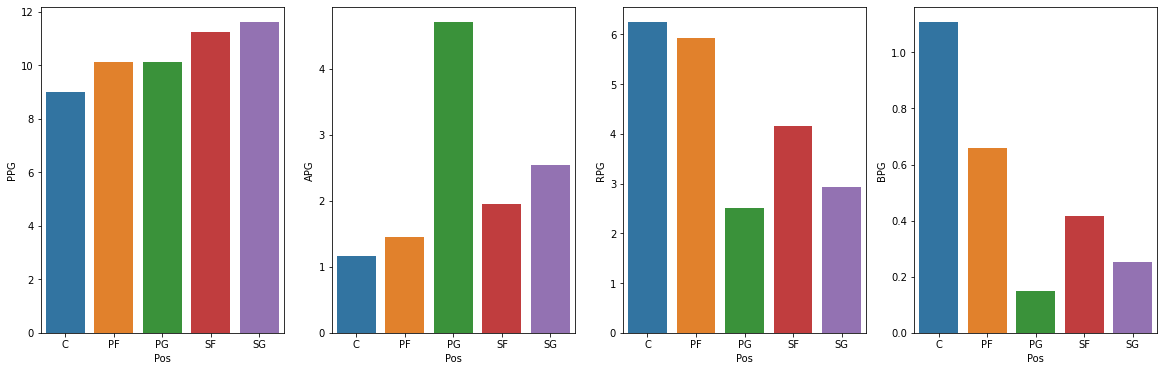

In [15]:
### Delta erwthma
psad =pd.DataFrame(tc_df)
psad['PPG']=(psad.PTS/psad.G)
psad['APG']=(psad.AST/psad.G)
psad['RPG']=(psad.TRB/psad.G)
psad['BPG']=(psad.BLK/psad.G)
temp3 =psad.groupby(['Pos']).mean()
fig,ax = plt.subplots(1, 4,figsize=(20,6))
sns.barplot(data=temp3,x=temp3.index,y='PPG',ci=95,ax = ax[0])
sns.barplot(data=temp3,x=temp3.index,y='APG',ci=95,ax = ax[1])
sns.barplot(data=temp3,x=temp3.index,y='RPG',ci=95,ax = ax[2])
sns.barplot(data=temp3,x=temp3.index,y='BPG',ci=95,ax = ax[3])

Για τo πρώτο γράφημα παρατηρούμε ότι όλοι οι παίχτες  πετυχαίνουν αρκετούς πόντους ανεξάρτητα θέσης αλλά με μια αισθητή κλιμάκωση με λιγότερους πόντους για τη θέση (C) μετα οι θέσεις (PF-PG)Και με τους περισσοτέρους πόντους οι θέσεις (SF-SG). Κάτι που είναι αναμενόμενο σε ένα παιχνίδι NBA καθώς όλοι οι παίχτες σκοράρουν αλλά στις θέσεις (SF-SG) παίζουν παίχτες με τα καλυτέρα σουτ .
Για τις ασιστς βλέπουμε ότι με διαφορά η θέση PG είναι μπροστά και αυτό είναι αναμενόμενο αφού παίχτες αυτής της θέσεις είναι που οδηγούν την επίθεση της ομάδας οπότε λογικό μια πάσα τους να οδηγήσει σε καλάθι .
Για τα ριμπάουντςκαι τα μπλοκς βλέπουμε ότι οι θέσεις (C-PF) έχουν τα περισσότερα και είναι αναμενόμενο αφού όταν γίνεται άμυνα παίζουν κάτω από το καλάθι ώστε να αναχαιτίσουν και να μπλοκάρουν τα σουτ των αντίπαλων 


In [16]:
### Epsilon erwthma
westG = pd.read_csv('games.csv')
westG.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
1,2021-11-17,22100214,Final,1610612765,1610612754,2021,1610612765,97.0,0.425,0.750,...,16.0,42.0,1610612754,89.0,0.418,0.737,0.243,14.0,43.0,1
2,2021-11-17,22100215,Final,1610612737,1610612738,2021,1610612737,110.0,0.506,0.833,...,28.0,40.0,1610612738,99.0,0.440,0.824,0.268,24.0,42.0,1
3,2021-11-17,22100216,Final,1610612751,1610612739,2021,1610612751,109.0,0.458,0.840,...,29.0,47.0,1610612739,99.0,0.393,0.857,0.250,20.0,50.0,1
4,2021-11-17,22100217,Final,1610612748,1610612740,2021,1610612748,113.0,0.483,0.824,...,29.0,39.0,1610612740,98.0,0.440,0.786,0.286,18.0,38.0,1


In [17]:
westG.shape

(25024, 21)

In [18]:
### Epsilon erwthma
westG_D= pd.read_csv('games_details.csv')
westG_D.head()

Q:\Anacoda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


In [19]:
### Epsilon erwthma
west_all_G = pd.merge(westG,westG_D,on='GAME_ID')
west_all_G.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.5,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.5,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.5,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.5,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.5,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


In [20]:
west_all_G.shape

(627526, 49)

In [21]:
west_ID=(west_all_G.PLAYER_ID == 201566) 
West_A_G = west_all_G[west_ID] 
West_A_G = West_A_G.reset_index()
West_A_G = West_A_G.drop(['index'],axis =1)
West_A_G.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,2021-11-17,22100219,Final,1610612749,1610612747,2021,1610612749,109.0,0.460,0.708,...,1.0,3.0,4.0,15.0,1.0,0.0,3.0,3.0,19.0,3.0
1,2021-11-15,22100209,Final,1610612747,1610612741,2021,1610612747,103.0,0.456,0.806,...,0.0,6.0,6.0,8.0,1.0,0.0,4.0,3.0,25.0,-13.0
2,2021-11-14,22100192,Final,1610612747,1610612759,2021,1610612747,114.0,0.518,0.765,...,1.0,10.0,11.0,7.0,2.0,0.0,7.0,3.0,14.0,11.0
3,2021-11-12,22100184,Final,1610612747,1610612750,2021,1610612747,83.0,0.354,0.800,...,0.0,5.0,5.0,3.0,0.0,0.0,5.0,1.0,20.0,-32.0
4,2021-11-10,22100170,Final,1610612747,1610612748,2021,1610612747,120.0,0.500,0.625,...,1.0,11.0,12.0,14.0,1.0,2.0,8.0,5.0,25.0,10.0


In [22]:
### Epsilon erwthma
West_A_G['Team-Win'] = 0 
West_A_G['Triple-Double'] = 0



for index, row in West_A_G.iterrows():
    ##check for wests tripledouble
    if ((row.AST > 9.0) & (row.PTS > 9.0 ) & (row.REB > 9.0)):
        West_A_G.loc[index, 'Triple-Double'] = 1
    else:
        West_A_G.loc[index, 'Triple-Double'] = 0
    #check if team plays at home 
    if((row.TEAM_ID) == (row.HOME_TEAM_ID )):
    
        check = 1
    else:
        check = 0
        
    #check if winning team was wests team
    if((check  == 1) & (row.HOME_TEAM_WINS == 1)):
        West_A_G.loc[index, 'Team-Win'] = 1
    elif((check  == 0) & (row.HOME_TEAM_WINS == 0)):
        West_A_G.loc[index, 'Team-Win'] = 1


mytab = pd.crosstab(West_A_G['Team-Win'],West_A_G['Triple-Double'])
mytab


Triple-Double,0,1
Team-Win,,
0,440,55
1,526,147


In [23]:
from scipy.stats import chi2_contingency

In [24]:
chiVal,pVal,df,exp =chi2_contingency(mytab)
chiVal,pVal,df,exp

(22.219793949529603,
 2.431540703056029e-06,
 1,
 array([[409.39212329,  85.60787671],
        [556.60787671, 116.39212329]]))

Από τα αποτελέσματα του χ2 τεστ βλέπουμε ότι έχουμε ένα p value ίσο με 
2.431540703056029e-06
και αυτό μας δείχνει ότι έχουν μεγάλη συσχέτιση τα δεδομένα μας άρα τo αν κάνει triple-double ο Westbrook επηρεάζει πολύ τις νίκες της ομάδας του. 
